# Accuracy tuning using `max-tree-size`

As explain in [1,2], the only difference between the MWPM decoder and the Union-Find decoder is whether they maintain detailed structures within each cluster. The `max_tree_size` parameter allows one to control how much detail they want to preserve inside each cluster. When `max_tree_size = 0`, it's equivalent to UF decoder; when `max_tree_size = infinity`, it's equivalent to MWPM decoder. This parameter actually generates a full spectrum of decoders between MWPM and UF decoder. We let the logical error rate of MWPM decoder be $p_M$ and the logical error rate of UF decoder be $p_U$, generally $p_U > p_M$. By tuning `max_tree_size`, we can create a decoder with logical error rate of $p_L$ which has $p_U \geq p_L \geq p_M$

To obtain the logical error rate of MWPM for code distance 11 and 13 (where p=0.05), we run `cargo run --release -- tool benchmark '[11]' '[0]' '[0.05]' --decoder fusion -p10` and `cargo run --release -- tool benchmark '[11]' '[0]' '[0.05]' --decoder fusion -p10`, respectively. For code distance 11, we obtain 
```
format: <p> <di> <nm> <shots> <failed> <pL> <dj> <pL_dev> <pe>
0.05 11 0 15122368 10000 0.0006612720970683956 11 2.0e-2 0
```
where the logical error rate $p_M$ is 0.0006612720970683956. Therefore, to reach at most 20% more logical error rates in exchange for faster decoding, we calculate $p_M * 1.2 = 0.00079352651$ and find the minimum `max_tree_size` value that satisfies $p_L < p_M * 1.2$ to be 2. 

Similarly, for code distance 13, we obtain 
```
format: <p> <di> <nm> <shots> <failed> <pL> <dj> <pL_dev> <pe>
0.05 13 0 46533892 10000 0.00021489713346994487 13 2.0e-2 0 
```
where the logical error rate $p_M$ is 0.00021489713346994487. Therefore, to reach at most 20% more logical error rates in exchange for faster decoding, we calculate $p_M * 1.2 = 0.00025787656$ and find the minimum `max_tree_size` value that satisfies $p_L < p_M * 1.2$ to be 3. 

For code distance 11 and 13 in Figure 1, we observe that the logical error rate $p_L$ plateaus as `max_tree_size` increases. Since computational cost increases with the amount of details preserved inside each cluster, we could resolve to approximately `max_tree_size = 7` to reach the same decoding accuracy of MWPM. 

Using `max-tree-tutorial.py`, we could also find the dependency of logical error rates on `max_tree_size` for other code distances, as shown in Figure 2. 

## Run terminal command to execute `max-tree-tutorial.py`
This python script exploits the benchmark tool of QEC-Playground to generate the logical error rates with respect to various `max_tree_size`. We can adjust `max_tree_size_vec` and `d_vec` for different range of `max_tree_size_vec` and different code distance. The output is stored under the same folder `/tutorial`. The following two plots are generated using the output from `max-tree-tutorial.py`. 

In [ ]:
!python3 max-tree-tutorial.py

## Logical Error Rate $p_L$ for code distance 11 and 13

Text(0.5, 1.0, 'Figure 1. Logical Error Rate $p_{L}$ against max tree size within each cluster')

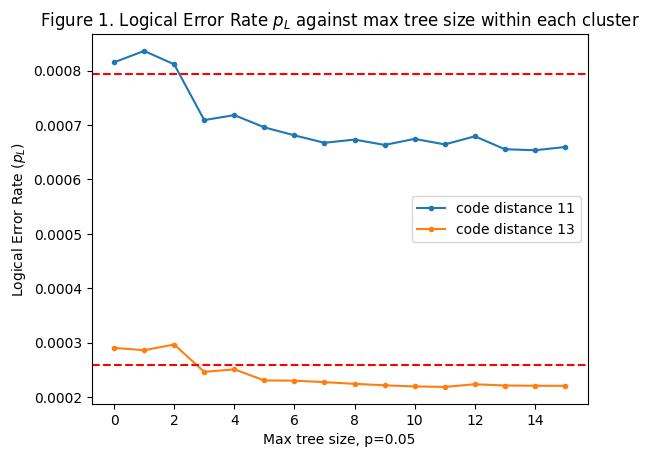

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

d_vec = [11, 13] # code distance
p = 0.05 
max_tree_size_vec = range(0,16)
pL12_vec = [0.00079352651, 0.00025787656] # p_M * 1.2
for i in range(0,len(d_vec)):
    d = d_vec[i]
    filename = f"d_{d}_{p}.txt"
    df = pd.read_csv(filename, sep='\s+', header=None)
    # display(df)
    # display(df.iloc[:,5])
    plt.plot(max_tree_size_vec, df.iloc[:,5], marker=".", label=f"code distance {d}")
    plt.axhline(pL12_vec[i], color='r', linestyle='dashed')
    
plt.legend()
plt.xlabel("Max tree size, p=0.05")
plt.ylabel("Logical Error Rate ($p_{L}$)")
plt.title("Figure 1. Logical Error Rate $p_{L}$ against max tree size within each cluster")

## Logical Error Rate $p_L$ for code distance 3, 5, 7, and 9

Text(0.5, 1.0, 'Figure 2. Logical Error Rate $p_{L}$ against max tree size within each cluster')

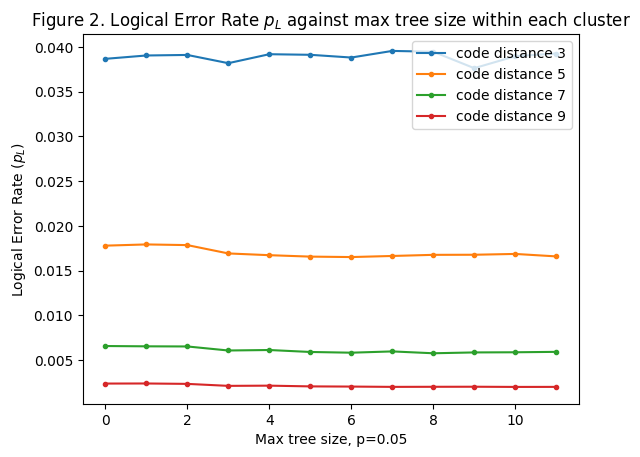

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

d_vec = [3, 5, 7, 9] # code distance
p = 0.05 
max_tree_size_vec = range(0,12)
for d in d_vec:
    filename = f"d_{d}_{p}.txt"
    df = pd.read_csv(filename, sep='\s+', header=None)
    # display(df)
    # display(df.iloc[:,5])
    plt.plot(max_tree_size_vec, df.iloc[:,5], marker=".", label=f"code distance {d}")
    # plt.axhline(y=df.iloc[-1,5] * 1.2, color='r', linestyle='dashed')
    
plt.legend()
plt.xlabel("Max tree size, p=0.05")
plt.ylabel("Logical Error Rate ($p_{L}$)")
plt.title("Figure 2. Logical Error Rate $p_{L}$ against max tree size within each cluster")